### Getting data from yann lecunn dataset

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [1]:
import idx2numpy
import seaborn as sns

#### Extract Training data

In [2]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [3]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [4]:
X_train.shape

(60000, 784)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
y_train.shape

(60000,)

#### Extract Test data

In [7]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [8]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_test.shape

(10000, 784)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
y_test.shape

(10000,)

#### Function to display a digit image from one 1-d representation of pixels

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
   
    image = image.reshape(28,28)
    sns.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    #plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

##### Displaying a set of digits

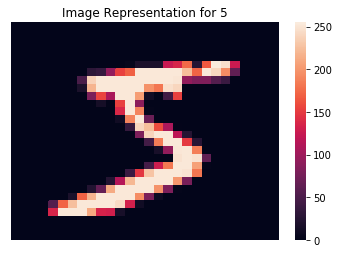

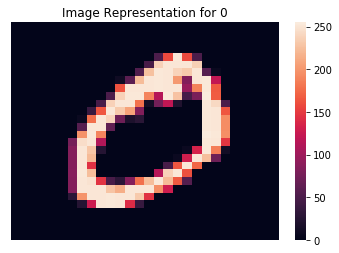

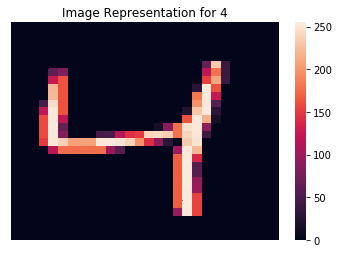

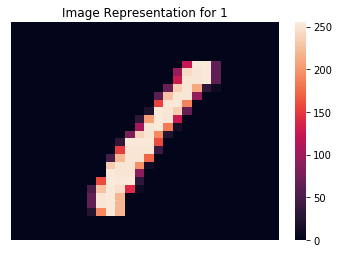

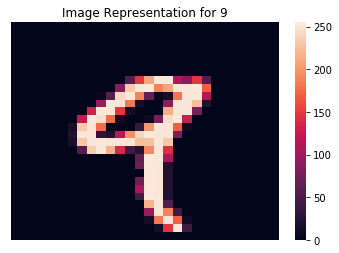

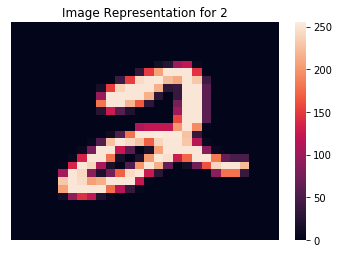

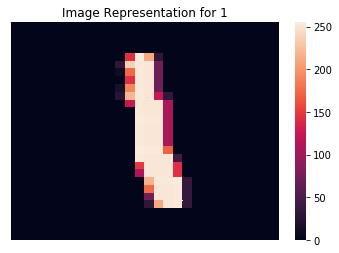

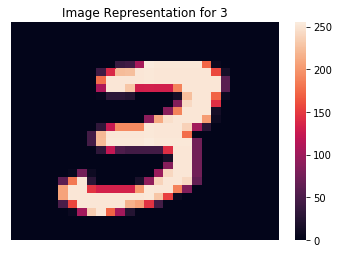

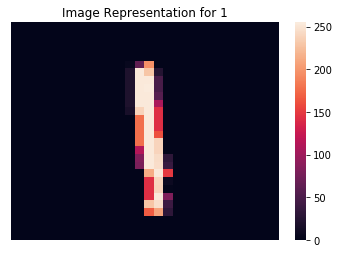

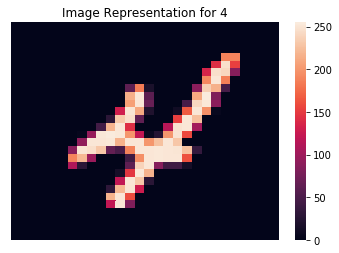

In [13]:
for i in range(10):
    display(X_train[i],y_train[i])

# Random Forest  classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict


rf_clf = RandomForestClassifier(max_depth= 10, random_state=0)

y_train_pred = cross_val_predict(rf_clf, X_train, y_train, cv=3)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

##### Calculate Cross Validation Score

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.92516497,  0.91614581,  0.92278842])

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [16]:
y_train_pred

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

**Create a confusion matrix for cross validation prediction & actual labels**

In [18]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [19]:
confusionMatrix

array([[5752,    2,   15,   19,   10,   22,   34,    4,   57,    8],
       [   0, 6581,   45,   22,   10,   13,   19,   13,   30,    9],
       [  47,   22, 5494,   69,   65,   14,   54,   77,   91,   25],
       [  19,   44,  140, 5406,   15,  193,   28,   54,  146,   86],
       [  14,    9,   27,    5, 5321,    8,   63,   22,   48,  325],
       [  54,   36,   28,  152,   43, 4834,  102,   15,   74,   83],
       [  39,   19,   30,    7,   37,   82, 5657,    1,   46,    0],
       [  17,   51,   91,   19,   85,    8,    3, 5701,   48,  242],
       [  23,   91,   69,  129,   43,   98,   53,   20, 5181,  144],
       [  36,   27,   37,   86,  152,   51,    8,  129,   68, 5355]], dtype=int64)

**Plot the Confusion matrix showing the diagonals.**

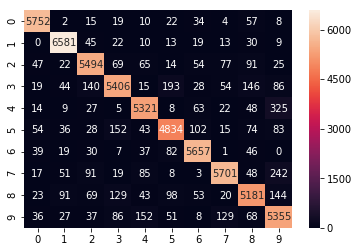

In [20]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [21]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

In [22]:
import numpy as np
#import seaborn as sns
np.fill_diagonal(norm_conf_mx, 0)

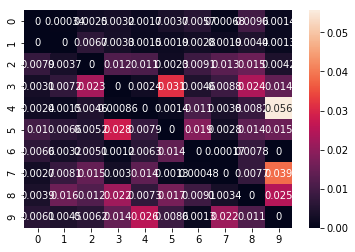

In [23]:
ax = sns.heatmap(norm_conf_mx,annot=True)

**Plot Confusion Matrix against Test data**

In [24]:
y_test_pred = rf_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 962,    1,    0,    0,    1,    5,    4,    1,    5,    1],
       [   0, 1118,    5,    3,    0,    3,    2,    0,    4,    0],
       [   7,    4,  947,   13,    6,    1,   14,   16,   17,    7],
       [   5,    2,   14,  912,    2,   29,    0,   13,   20,   13],
       [   4,    1,    2,    1,  880,    3,   11,    1,    9,   70],
       [   8,    6,    3,   32,    8,  785,   12,    4,   17,   17],
       [  14,    3,    2,    0,    4,    6,  923,    2,    4,    0],
       [   2,    9,   25,    2,   11,    0,    1,  922,    8,   48],
       [   3,    7,    9,   16,   17,   11,   11,    4,  874,   22],
       [   4,    6,    4,   13,   24,    7,    2,   11,   14,  924]], dtype=int64)

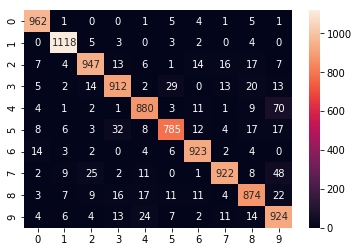

In [26]:
ax = sns.heatmap(confusionMatrix,annot=True,fmt='d')

**Plot Error matrix to see the misclassifications**

In [27]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

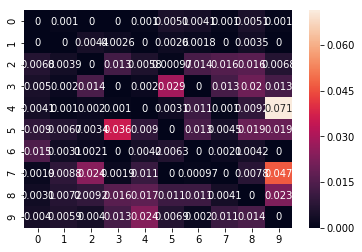

In [28]:
np.fill_diagonal(norm_conf_mx, 0)
ax = sns.heatmap(norm_conf_mx,annot=True)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.92469999999999997